# Data Analysis: Answer the Key Questions

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Key Question 1) 
#### What are the average, minimum, and maximum heart rate values on a daily basis?

1.1) Calculate **global** values of: *minimum heart rate*, *average heart rate*, *maximum heart rate*. <br>

In this section, we'll calculate:

- The lowest heart rate value ever recorded in the given time range.
- The average heart rate value recorded
- The highest heart rate value ever recorded in the given time range.

First, merge all the datasets about heart rates into one dataset

In [20]:
def merge_daily_datasets(folder_path):
    """
    Merge all the daily datasets into a single dataframe.

    Args:
        folder_path (str): Path to the folder containing all the daily datasets.
    Returns:
        pd.DataFrame: Complete merged Dataset
    """
    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".csv")]
    dfs = []

    for f in all_files:
        date = os.path.basename(f).replace(".csv", "")
        df = pd.read_csv(f)
        df['date'] = pd.to_datetime(date)
        dfs.append(df)
        
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

In [21]:
heart_rates_directory = "data/cleaned/heart_rates"

heart_rates_df = merge_daily_datasets(heart_rates_directory)

heart_rates_df.head()

,timestamp,heart_rate,date
0,14:58,69.0,2024-12-21
1,15:00,70.0,2024-12-21
2,15:02,66.0,2024-12-21
3,15:04,71.0,2024-12-21
4,15:06,75.0,2024-12-21


In [22]:
heart_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11790 entries, 0 to 11789
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   11790 non-null  object        
 1   heart_rate  11773 non-null  float64       
 2   date        11790 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 276.5+ KB


In [23]:
def calculate_daily_hr_stats(df):
    """
    Calculates average, minimum and maximum heart rate on a daily basis.
    
    Args:
        complete_df (pd.DataFrame): Complete merged Dataset
    
    Returns:
        dict: Dictionary storing the global values of minimum, average and maximum heart rate.
    """
    stats = {
        "minimum": int(df['heart_rate'].min()),
        "average": int(df['heart_rate'].mean()),
        "maximum": int(df['heart_rate'].max())
    }
    return stats

In [24]:
global_values = calculate_daily_hr_stats(heart_rates_df)

for k, v in global_values.items():
    print(k + ' --> ' + str(v) + ' bpm.')

minimum --> 36 bpm.
average --> 64 bpm.
maximum --> 187 bpm.


1.2) View the minimum, average and maximum heart rate values on a daily basis for the last *n* days.

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_hr_values(df, n, show_minimum=True, show_average=True, show_maximum=True):
    """
    Displays, for the last n days, dynamic bars based on the parameters 
    show_minimum, show_average, and show_maximum.

    Args:
        df (pd.DataFrame): DataFrame containing 'date' and 'heart_rate' columns.
        n (int): Number of days to display.
        show_minimum (bool): If True, show bars for the minimum heart rate values.
        show_average (bool): If True, show bars for the average heart rate values.
        show_maximum (bool): If True, show bars for the maximum heart rate values.
    """
    
    grouped = df.groupby('date')['heart_rate'].agg(['min', 'mean', 'max']).reset_index()
    
    grouped = grouped.tail(n)
    
    plt.figure(figsize=(10, 6))
    bar_width = 0.25
    x = range(len(grouped))

    offset = 0

    if show_minimum:
        plt.bar([p + offset * bar_width for p in x], grouped['min'], width=bar_width, label='Min HR', color='#FFE1A8')
        offset += 1
    if show_average:
        plt.bar([p + offset * bar_width for p in x], grouped['mean'], width=bar_width, label='Mean HR', color='#E26D5C')
        offset += 1
    if show_maximum:
        plt.bar([p + offset * bar_width for p in x], grouped['max'], width=bar_width, label='Max HR', color='#472D30')
        offset += 1
    
    plt.xlabel('Date')
    plt.ylabel('Heart Rate')
    plt.title(f'Heart Rate Stats for Last {n} Days')
    plt.xticks([p + (offset - 1) * bar_width / 2 for p in x], grouped['date'].dt.strftime('%Y-%m-%d'), rotation=45)
    plt.yticks([i for i in range(0, 220, 10)])
    plt.legend()
    plt.tight_layout()

    plt.show()

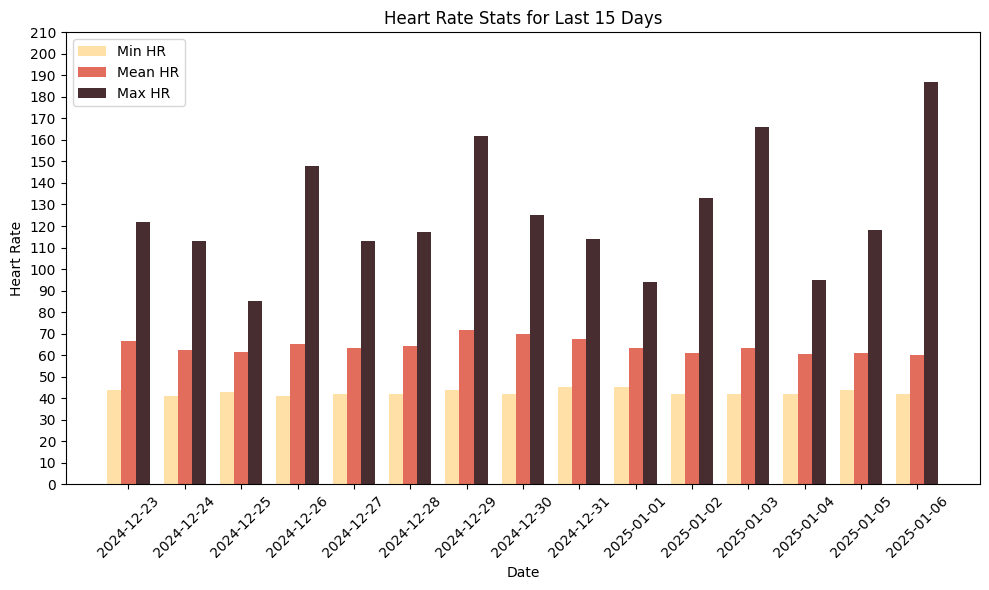

In [79]:
plot_hr_values(heart_rates_df, 15, show_minimum=True, show_average=True, show_maximum=True)